#### Brief Introduction about Titanic Ship¶
##### Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. Though there were about 2,224 passengers and crew members, we are given data of about 1,300 passengers. Out of these 1,300 passengers details, about 9000 data is used for training purpose and remaining 400 is used for test purpose. In this competition we are given about 400 test data with missing survived column and we have to use different machine learning algorithms to predict whether the passengers in the test data survived or not. Both training and test data arenot clean(contains lots of missing values), so main goal of this competition is to clean the data and build the model with best accuracy.

#### Understanding the data¶
##### Survival : 0 = No, 1 = Yes
##### Pclass : A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower
##### sibsp : The # of siblings / spouses aboard the Titanic Sibling = brother, sister, stepbrother, stepsister Spouse =
##### husband, wife (mistresses and fiancés were ignored)
##### parch : The # of parents / children aboard the Titanic Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.
##### Ticket : Ticket number
##### Fare : Passenger fare
##### Cabin : Cabin number embarked
##### Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
##### Name, Sex , Age are self-explanatory

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os  
os.chdir('C:\\Users\\sande\\OneDrive\\Desktop\\Excel')

In [3]:
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("Total number of rows in training data ", train_data.shape[0])
print("Total number of columns in training data ", train_data.shape[1])
print("Total number of rows in test data ", test_data.shape[0])
print("Total number of columns in test data ", test_data.shape[1])

Total number of rows in training data  891
Total number of columns in training data  12
Total number of rows in test data  418
Total number of columns in test data  11


In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

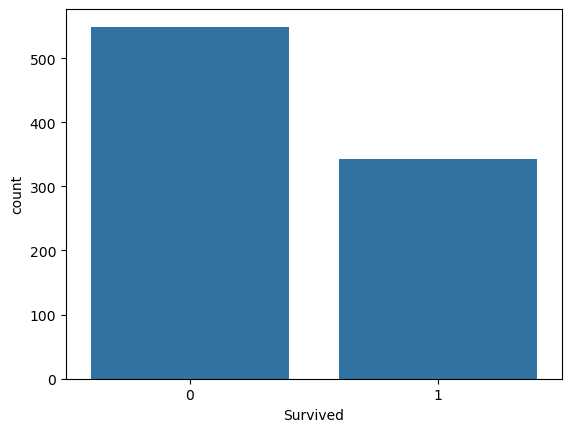

In [9]:
#Visualizing the Number of survived passenger
sns.countplot(data = train_data, x = 'Survived')
plt.show()
# here we plot only for train_data as we donot have Survived column for test data,
# This plot show that around 600 people died while around 300 survived

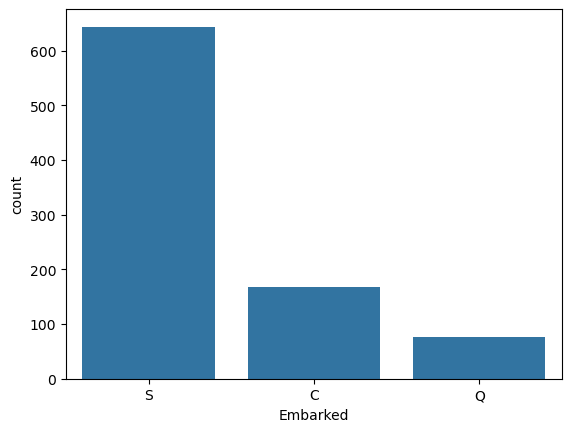

In [10]:
sns.countplot(data = train_data, x = 'Embarked')
plt.show()

[]

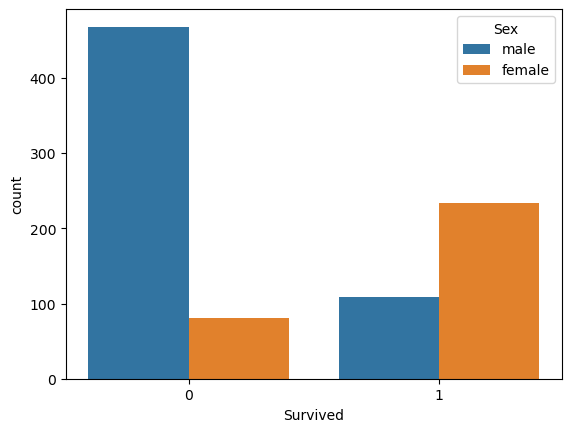

In [11]:
#visualizing whether gender affect the survival rate or not
sns.countplot(data = train_data, hue = 'Sex', x = 'Survived' )
plt.plot()
# the graph clearly show that death rate for male passenger is way more than that for female

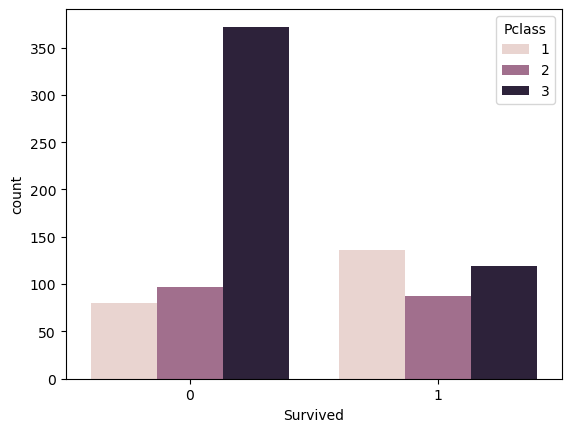

In [14]:
# visualizing whether pclass affect the survial rate or not
sns.countplot( data = train_data, x = "Survived", hue = 'Pclass',)
plt.show()
# this graph clearly show that people in third class are more likely to die 

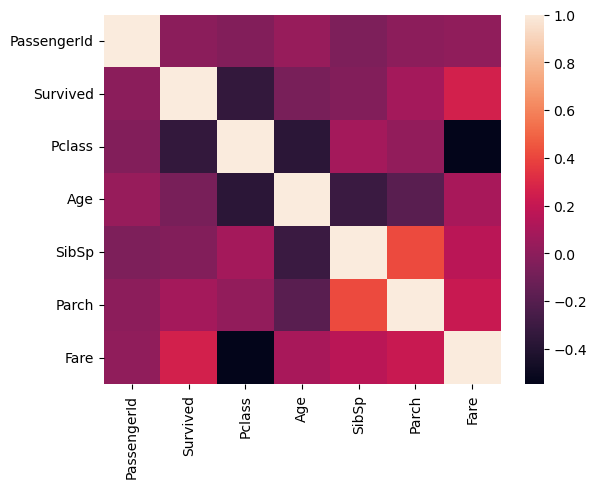

In [21]:
x = train_data.drop(['Name','Sex','Embarked','Ticket','Cabin'], axis = 1)
corr_train = x.corr()
sns.heatmap(corr_train)
plt.show()
# this shows that SibSp and Parch columns are releted , so we can combine this two column to reduce the dimension
# of our data.. this plot only works for columns with numercal data

In [23]:
((train_data.groupby(['Sex','Survived']).Survived.count() * 100) / train_data.groupby('Sex').Survived.count())
# this shows that female have around 74% chance of survival while male have around 81% chance of death

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

### Dealing with the Missing values

In [27]:
# before filling the missing values, let's drop Cabin column from both data.
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

In [29]:
combined_data = [train_data, test_data]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
********************
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
********************


In [30]:
# we simply can use SimpleImputer class form the sklearn to deal with the missing value
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
train_data[['Age']] = impute.fit_transform(train_data[['Age']])
test_data[['Age']] = impute.fit_transform(test_data[['Age']])
test_data[['Fare']] = impute.fit_transform(test_data[['Fare']])
train_data.Embarked.fillna('S', inplace = True)

C:\Users\sande\AppData\Local\Temp\ipykernel_5604\1561440640.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data.Embarked.fillna('S', inplace = True)


In [35]:
combined_data = [train_data, test_data]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
********************
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
********************


### Converting a categorical feature
#### Let's start by converting Sex feature to categorical female=1 and male=0

In [38]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
train_data.Sex = train_data.Sex.apply(change_gender)
test_data.Sex = test_data.Sex.apply(change_gender)

# we simply can use mapfunction to change the gender
# train_data.Sex = train_data.Sex.map({'female':1, 'male':0})

##### using map funcion to change the Embarked column S = 1, C = 2, Q = 0

In [42]:
change = {'S':1,'C':2,'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)

### Feature Extraction

##### while visualizing the correlation heatmap we came to know that Sibsp and Parch columns were closely related so lets created new column called Alone using this two columns -------> 1 = Alone , 0 = not Alone

In [46]:
train_data['Alone'] = train_data.SibSp + train_data.Parch
test_data['Alone'] = test_data.SibSp + test_data.Parch

train_data.Alone = train_data.Alone.apply(lambda x: 1 if x == 0 else 0)
test_data.Alone = test_data.Alone.apply(lambda x: 1 if x == 0 else 0)

In [48]:
# now lets drop SibSp and Parch column for both training and testing data
train_data.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp','Parch'], axis = 1, inplace = True )

In [50]:
columns_to_drop = ['Name','PassengerId','Ticket']
train_data.drop(columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns_to_drop[1], axis = 1, inplace = True)

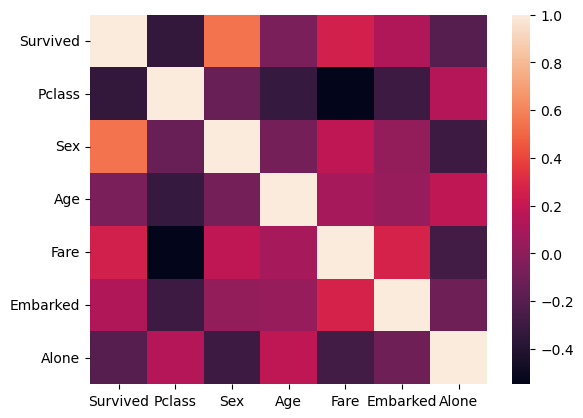

In [52]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()

### Preparing training and testing data

In [66]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop('Name', axis = 1)
X_test = X_test.drop('Ticket', axis = 1)
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (891, 6)
Shape of Y_train (891,)
Shape of x_test (418, 6)


### Neural Network

In [69]:
import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

#### Defining model:

In [72]:
model = Sequential()
model.add(Dense(units = 32, input_shape = (6,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))

C:\Users\sande\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,657 (84.60 KB)

 Trainable params: 21,529 (84.10 KB)

 Non-trainable params: 128 (512.00 B)

In [76]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 50)

Epoch 1/50
28/28 - 4s - 156ms/step - acc: 0.6352 - loss: 0.6462
Epoch 2/50
28/28 - 0s - 3ms/step - acc: 0.6644 - loss: 0.6128
Epoch 3/50
28/28 - 0s - 3ms/step - acc: 0.6678 - loss: 0.5933
Epoch 4/50
28/28 - 0s - 3ms/step - acc: 0.6835 - loss: 0.5957
Epoch 5/50
28/28 - 0s - 3ms/step - acc: 0.6644 - loss: 0.5898
Epoch 6/50
28/28 - 0s - 3ms/step - acc: 0.6947 - loss: 0.5677
Epoch 7/50
28/28 - 0s - 4ms/step - acc: 0.7160 - loss: 0.5605
Epoch 8/50
28/28 - 0s - 3ms/step - acc: 0.7194 - loss: 0.5411
Epoch 9/50
28/28 - 0s - 3ms/step - acc: 0.7340 - loss: 0.5522
Epoch 10/50
28/28 - 0s - 3ms/step - acc: 0.7486 - loss: 0.5293
Epoch 11/50
28/28 - 0s - 3ms/step - acc: 0.7565 - loss: 0.5313
Epoch 12/50
28/28 - 0s - 3ms/step - acc: 0.7508 - loss: 0.5255
Epoch 13/50
28/28 - 0s - 3ms/step - acc: 0.7609 - loss: 0.5052
Epoch 14/50
28/28 - 0s - 3ms/step - acc: 0.7621 - loss: 0.5171
Epoch 15/50
28/28 - 0s - 3ms/step - acc: 0.7464 - loss: 0.5320
Epoch 16/50
28/28 - 0s - 3ms/step - acc: 0.7699 - loss: 0.5071

### Prediction for test data

In [78]:
predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 1 0 1 0 0 0]


In [83]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Precision :  75.32
Accuracy :  79.35
Recall :  68.71
F1 score :  71.87
AUC :  77.34


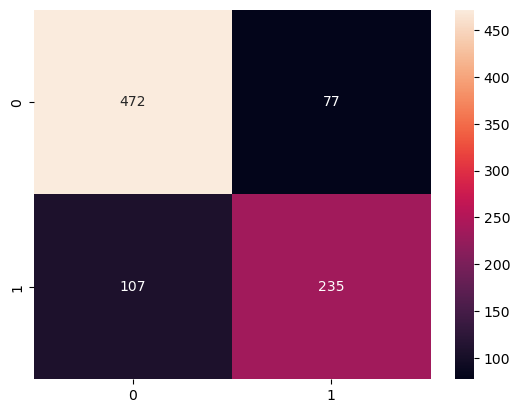

In [85]:
# plotting the confusion matrix in heatmap
matrix = metrics.confusion_matrix(Y_train, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()